<div style="
    background-color: #ce9b3bff; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h1>Statistiques inferentielles</h1>
<p>Les phénomènes observés dans l'échantillon de données peuvent-ils se généraliser à l'ensemble d'une population ?<br>
Les statistiques inferentielles permettent, à partir d'un échantillon de données, de généraliser des propriétées à une population
</p>
</div>



## Hypothèses

Tous les tests reposent sur la formulation de **2 hypothèses** :

|hypothèse nulle | hypothèse alternative |
|----|-----|
|$H_0$ | $H_1$|
|**situation de base**|**changement**|

Evalue la probabilité que l'hypothèse nulle (pas de changement) soit vrai<br>
Si cette probabilité est trop faible, inférieure à un seuil, alors $H_0$ est rejettée en faveur de $H_1$<br>
suggère la présence d'un effet ou d'un changement

### p-value
probabilité utilisée pour invalider ou non $H_0$
- p-value grande → données compatibles avec $H_0$
- p-value petite → données peu compatibles avec $H_0$


| `p-value` |conclusion|
| --- |----|
| > seuil |Les données sont compatibles avec $H_1$|
| < seuil |on rejette $H_0$, $H_1$ est plausible|

### Significativité

Le résultat du test significatif au seuil des 5% en général (0.05)

Si la `p-value` est extremement faible :
- le résultat est très **significatif**
- $H_0$ étant très en dessous du seuil, à une très faible probabilité de se produire


### Marge d'erreur
mesure statistique qui quantifie l'incertitude liée à la taille de l'échantillon étudié<br>
Plus l'échantillon est important, plus la marge d'erreur diminue<br>
Par exemple :<br>
score annoncé de 54 % avec un intervalle de confiance à 95 % de [51,9;56,1]<br>
Signifie :
- 95 % de chance d'avoir un score entre 51,9% et 56,1%
- 5 % de chance d'avoir un score en dehors de cet intervalle de confiance

In [11]:
# pip install scipy
from scipy import stats
# pip install statsmodels
import statsmodels.api as sm


<div style="
    background-color: #ce9b3bff; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>QQ-plot</h3>
</div>

compare les quantiles du jeu de donnée avec les quantiles d'une distribution théorique (souvent, la distribution normale)<br>
Cela permet de voir si les quantiles sont normalement distribués ou non

Un quantile est un point qui coupe la distribution.


- Quartiles → 4 parts :
    - Q1 (25 %)
    - Q2 = médiane (50 %)
    - Q3 (75 %)
- Déciles → 10 parts
- Percentiles → 100 parts

👉 Quand on dit “il y a 4 quantiles”, on parle des quartiles, pas des quantiles en général.

Dans un Q-Q plot, on utilise autant de quantiles qu’il y a de données :

s'il y a n observations

alors il y à n quantiles empiriques

donc n points sur le Q-Q plot

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

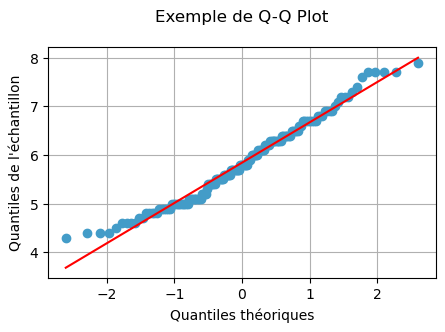

In [13]:
iris = sns.load_dataset("iris")
# Sélection d'une colonne numérique
data = iris['sepal_length']
# Création d'un QQ-plot
plt.figure(figsize=(5,3))
stats.probplot(data, dist= "norm", plot=plt)

# Modification de la couleur des points
dots = plt.gca().get_lines()[0]
dots.set_markerfacecolor('#439cc8')
dots.set_markeredgecolor('#439cc8')

# Titres
plt.title("Exemple de Q-Q Plot\n ")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles de l'échantillon")
plt.grid(True)
plt.show()
          

La diagonale droite (en rouge) représente une distribution normale

**Les valeurs des quantiles en **x** (distribution théorique) sont :**

- centrées autour de 0
- à + ou - 2 écarts-types

**Les valeurs des quantiles en **y** ont les valeurs de l'échantillon**<br>

Si les points sont alignés avec la diagonale, la distribution est normale<br>
Le graph met en lumière les déviations et permet de détecter les outliers


<div style="
    background-color: #ce9b3bff; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Tests de normalité</h3>
    <p>Déterminer la normalité d'une distribution permet de choisir le type de tests à mener pour évaluer  les lens entre 2 variables</p>
    - distribution normale : tests paramétrique<br>
    - distribution anormale : tests nonparamétrique
</div>

![test de normalite](../img/tests_normalite.png)


#### Anderson–Darling
- $𝐻_0$ : normalité
- On rejette $𝐻_0$ si : statistique > valeur critique


In [14]:
# Tests de normalité Jar-Bera, Anderson-Darling, Kolmogorov-Smirnov, Shapiro-Wilk
jb_stats, jb_pvalue = stats.jarque_bera(data)
ad_stats, ad_pvalue, _ = stats.anderson(data, dist="norm")
ks_stats, ks_pvalue = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
sw_stats, sw_pvalue = stats.shapiro(data)

# Affichage des résultats
print(f"Test de Jarque-Bera:\nStatistic = {jb_stats}\np-value = {jb_pvalue}\n")
print(f"Test de Anderson-Darling:\nStatistic = {ad_stats}\nCritical Values = {ad_pvalue}\n")
print(f"Test de Kolmogorov-Smirnov:\nStatistic = {ks_stats}\np-value = {ks_pvalue}\n")
print(f"Test de Shapiro-Wilk:\nstatistic = {sw_stats}\np-value = {sw_pvalue}\n")


Test de Jarque-Bera:
Statistic = 4.4858754373509475
p-value = 0.1061462181718774

Test de Anderson-Darling:
Statistic = 0.8891994860134105
Critical Values = [0.562 0.64  0.767 0.895 1.065]

Test de Kolmogorov-Smirnov:
Statistic = 0.08865361377316233
p-value = 0.1781373784859196

Test de Shapiro-Wilk:
statistic = 0.9760902723490532
p-value = 0.010181161454691156



**Jarque–Bera et Kolmogorov–Smirnov**  
- p-values = 0,106 et 0,178  
- p-values > 0,05  
- L’hypothèse nulle ($H_0$) de normalité n’est pas rejetée  
- Les données sont <font color="green">compatibles avec une distribution normale</font>  

**Anderson–Darling**  
- statistique = 0,889  
- valeur critique à 5 % = 0,767  
- 0,889 > 0,767  
- L’hypothèse nulle de normalité est rejetée au seuil de 5 %  
- Les données ne sont <font color="red">pas compatibles avec une distribution normale</font> à ce seuil  

**Shapiro–Wilk**  
- p-value = 0,01  
- p-value < 0,05  
- L’hypothèse nulle de normalité est rejetée  
- Les données ne sont <font color="red">pas compatibles avec une distribution normale</font>
- Ce test est le plus approprié car l'échantillon ne comporte que 150 valeurs


<div style="
    background-color: #ce9b3bff; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Tests statistiques bivariés</h3>
    <p>Examinent la relation entre 2 variables<br>
    - identifie des associations ou de différences significatives<br>
    - base pour des analyses plus complexes<br>
            - la regression<br>
            - analyse multivariée<br>
    </p>
</div>

<div style="
    background-color: #288acfff; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h4>Tests bivariés entre 2 variables de même nature</h4>
</div>

![](../img/tests_bivaries.png)

<div style="
    background-color: #cfa828ff; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<h5>Corrélation entre variables numériques</h5>
</div>

<div style="
    background-color: #cfa828ff; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<h4>Corrélation de type linéaire - Pearson</h4>
<p>
La relation entre 2 variables peut être décrite par une ligne droite<br><br>
Mesure entre -1 et 1  la force du lien :<br>
1 = relation parfaitement positive<br>
0 = aucune relation<br>
-1 = relation parfaitement négative</p>


<p>Au dela de 0,9, il est recommander de voir s'il est pertinent de supprimer une des 2 variables ou de fusionner les 2 pour limiter la redondance d'information et ainsi améliorer la performance du modèle
</p>
</div>

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'sepal_length'),
  Text(0, 1.5, 'sepal_width'),
  Text(0, 2.5, 'petal_length'),
  Text(0, 3.5, 'petal_width')])

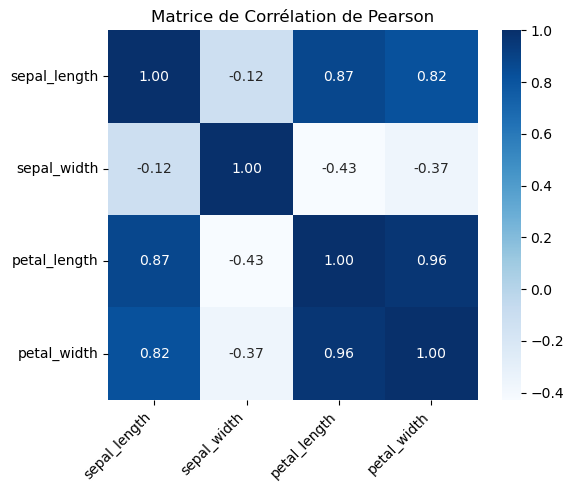

In [15]:
# Calcul de la matrice de corrélation
correlation_matrix = iris.corr(numeric_only=True)
# Création d'une Heatmap
sns.heatmap(correlation_matrix, 
            annot=True, fmt=".2f", cmap='Blues', cbar=True, square=True, linewidth=0., linecolor='black')
# etiquettes et titre
plt.title('Matrice de Corrélation de Pearson', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

<div style="
    background-color: #cfa828ff; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<h4>Corrélation non linéaire - Spearman</h4>
<p>
Calcule la corrélation à partir du rang plutôt que des valeurs elles-mêmes<br><br>
- les liens entre variables ne sont pas linéaire<br>
- les données ne sont pas normalement distribuées<br>
- existe des valeurs abérantes (moins sensible que **Pearson**<br>
</div>

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'sepal_length'),
  Text(0, 1.5, 'sepal_width'),
  Text(0, 2.5, 'petal_length'),
  Text(0, 3.5, 'petal_width')])

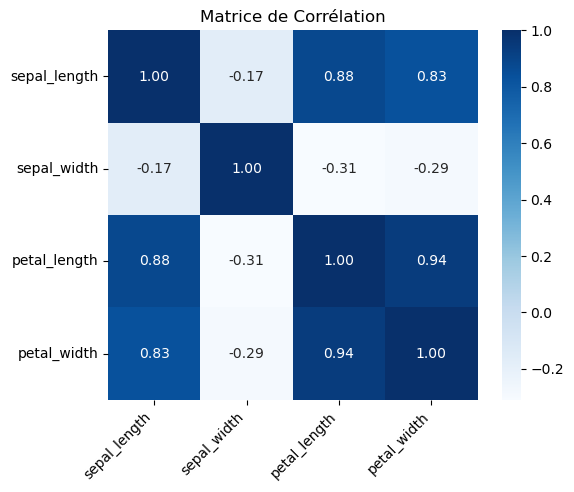

In [16]:
# Calcul de la matrice de corrélation de Spearman
correlation_matrix = iris.corr(numeric_only=True, method='spearman')
# Création d'une Heatmap
sns.heatmap(correlation_matrix, 
            annot=True, fmt=".2f", cmap='Blues', cbar=True, square=True, linewidth=0., linecolor='black')
# etiquettes et titre
plt.title('Matrice de Corrélation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

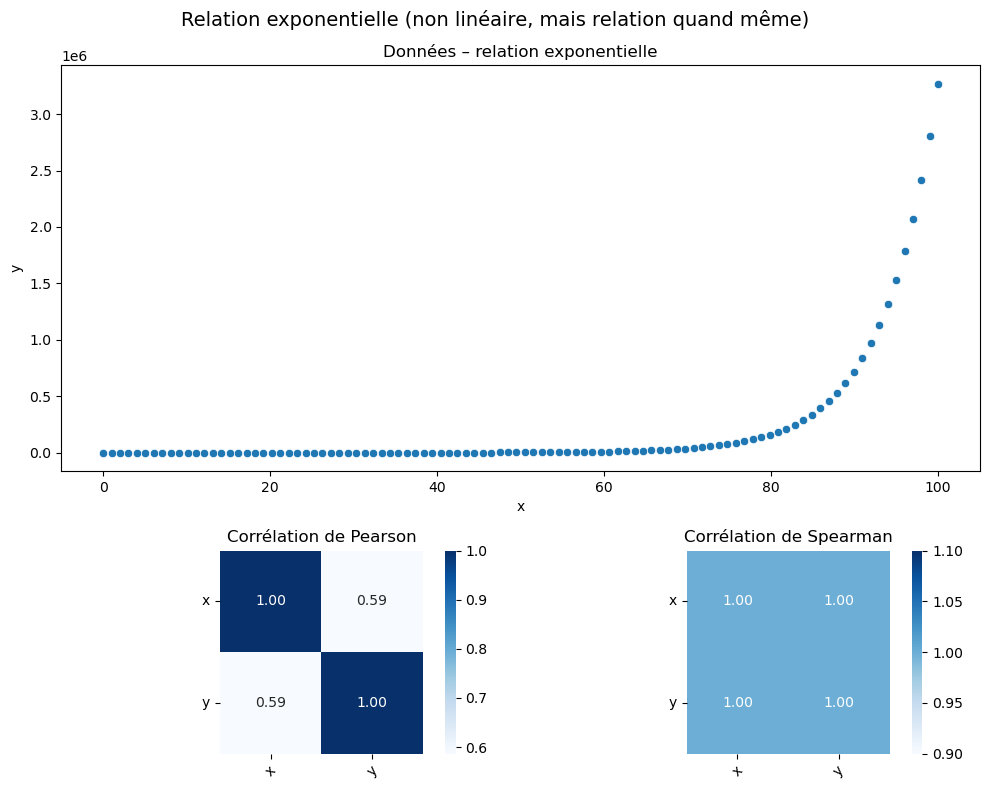

In [17]:
# Création d'un DataFrame avec une relation non linéaire (exponentielle)
x = np.linspace(0, 100, 100)
y = np.exp(0.15* x)
df = pd.DataFrame({'x': x, 'y': y})

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Relation exponentielle (non linéaire, mais relation quand même)', fontsize=14)

gs = fig.add_gridspec(2, 2, height_ratios=[2, 1])

# Scatter plot (toute la première ligne)
ax_scatter = fig.add_subplot(gs[0, :])
sns.scatterplot(data=df, x='x', y='y', ax=ax_scatter)
ax_scatter.set_title('Données – relation exponentielle')
ax_scatter.tick_params(axis='y')

# Pearson
ax_pearson = fig.add_subplot(gs[1, 0])
corr_pearson = df.corr(numeric_only=True)
sns.heatmap(
    corr_pearson,
    annot=True, fmt=".2f",
    cmap='Blues', square=True, cbar=True,
    ax=ax_pearson
)
ax_pearson.set_title('Corrélation de Pearson')
ax_pearson.tick_params(axis='x', rotation=45)
ax_pearson.tick_params(axis='y', rotation=0)

# Spearman
ax_spearman = fig.add_subplot(gs[1, 1])
corr_spearman = df.corr(numeric_only=True, method='spearman')
sns.heatmap(
    corr_spearman,
    annot=True, fmt=".2f",
    cmap='Blues', square=True, cbar=True,
    ax=ax_spearman 
)
ax_spearman.set_title('Corrélation de Spearman')
ax_spearman.tick_params(axis='x', rotation=45)
ax_spearman.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()
